In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation
from sklearn import datasets

In [6]:
# Import the data

data = pd.read_csv(r'iris.csv',header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# Add headers to the csv file

data.to_csv("iris.csv", header=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm","PetalWidthCm","Species"], index=False)

In [15]:
# Recreate the dataframe

data = pd.read_csv(r'iris.csv')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [16]:
#Check for the null values
data.info()

# Since all the dataset are non null hence it is not required to do any kind of subsititution or droping of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  149 non-null    float64
 1   SepalWidthCm   149 non-null    float64
 2   PetalLengthCm  149 non-null    float64
 3   PetalWidthCm   149 non-null    float64
 4   Species        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [17]:
# Get the descriptive information about the data

data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# Lets check for the imbalance if present in the dataset

data['Species'].value_counts()

# All the categories are having equal number of records hence imbalance problem does not exist

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: Species, dtype: int64

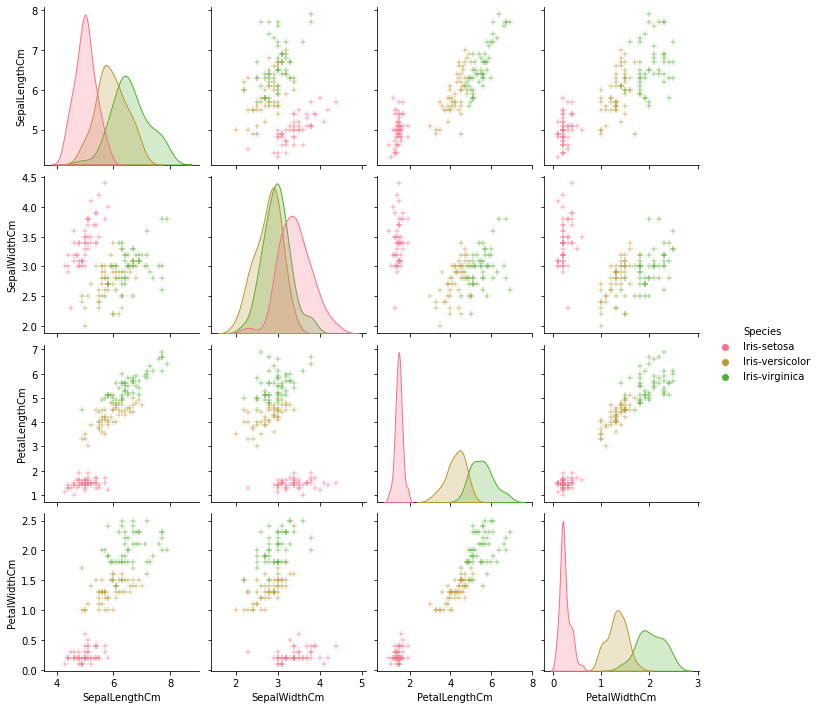

In [19]:
# Visualization to check if we can find any clear distinction in the feature information

g = sns.pairplot(data, hue='Species', markers='+')
plt.show()

# Looking into the below plots two things are quite clear:

#1. After graphing the features in a pair plot, #it is clear that the relationship between pairs of features of a iris-setosa 
#(in pink) is distinctly different from those of the other two species.

# 2. There is some overlap in the pairwise relationships of the other two species, 
# iris-versicolor (brown) and iris-virginica (green).

In [20]:
# Prepare the dataset before spliting

target_values = data.pop('Species') #or you can call it 'labels'
target_values.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2], inplace = True)

# Split the train and test dataset

train_data, test_data, train_target, test_target = train_test_split(data, target_values, test_size=0.2)

In [21]:
# Execute the model
#There are 3 types of Naive Bayes model: GaussianNB, MultinomialNB, BernolliNB
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
#Model 1.1 gnb
gnb = GaussianNB()
gnb.fit(train_data, train_target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
#Model 1.2 mnb
mnb = MultinomialNB()
mnb.fit(train_data, train_target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
#Model 1.3 bnb
bnb = BernoulliNB()
bnb.fit(train_data, train_target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [26]:
#Training Scores (correct rate) - Accuracy
print("gnb --", gnb.score(train_data, train_target))
print("mnb --", mnb.score(train_data, train_target))
print("bnb --", bnb.score(train_data, train_target))

gnb -- 0.9495798319327731
mnb -- 0.7394957983193278
bnb -- 0.36134453781512604


In [25]:
#Testing Scores (correct rate) - Accuracy
print("gnb --", gnb.score(test_data, test_target))
print("mnb --", mnb.score(test_data, test_target))
print("bnb --", bnb.score(test_data, test_target))

gnb -- 0.9666666666666667
mnb -- 0.5333333333333333
bnb -- 0.2


In [ ]:
#You may noticed the result of bnb is not as good as the others. The reason here is, in order to perform bnb, 
#we need to transform the data to binary version, which can be done by specify 'binarize=True' inside bnb

bnb_binary = BernoulliNB(binarize=True)
bnb_binary.fit(train_data, train_target)
#Training Score (correct rate)
bnb_binary.score(train_data, train_target)
#Testing Score (correct rate)
bnb_binary.score(test_data, test_target)

0.6666666666666666

In [ ]:
print("Multinomial Accuracy : {}".format(mnb.score(test_data , test_target)))

Multinomial Accuracy : 0.9333333333333333


In [ ]:
# confisuon matrix
y_pred = bnb_binary.predict(test_data)
y_true = test_target
from sklearn.metrics import confusion_matrix

cm_bernoulli = confusion_matrix(y_true,y_pred)

In [ ]:
y_pred = mnb.predict(test_data)
y_true = test_target
from sklearn.metrics import confusion_matrix

cm_multinomial = confusion_matrix(y_true,y_pred)

In [ ]:
y_pred = gnb.predict(test_data)
y_true = test_target
from sklearn.metrics import confusion_matrix

cm_gaussian = confusion_matrix(y_true,y_pred)

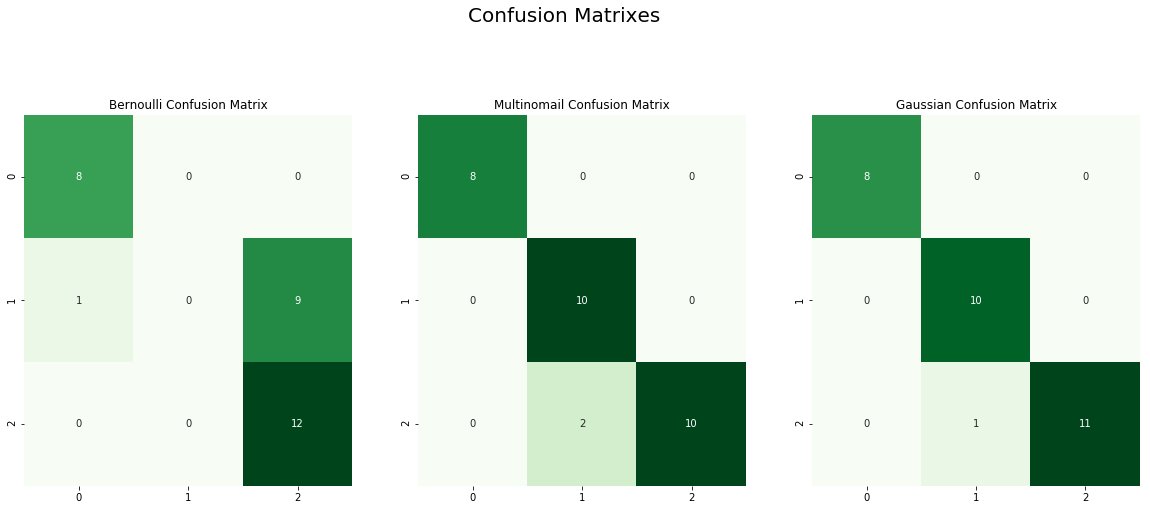

In [ ]:
# Print the confusion Matrix

plt.figure(figsize=(20,15))

plt.suptitle("Confusion Matrixes",fontsize=20)

plt.subplot(2,3,1)
plt.title("Bernoulli Confusion Matrix")
sns.heatmap(cm_bernoulli,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,2)
plt.title("Multinomail Confusion Matrix")
sns.heatmap(cm_multinomial,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,3)
plt.title("Gaussian Confusion Matrix")
sns.heatmap(cm_gaussian,cbar=False,annot=True,cmap="Greens",fmt="d")

<Figure size 432x288 with 0 Axes>

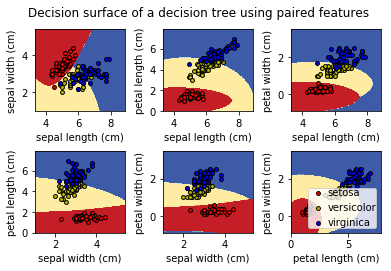

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = GaussianNB().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()

<Figure size 432x288 with 0 Axes>

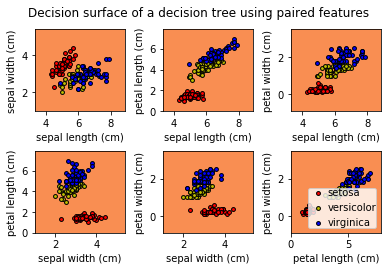

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = BernoulliNB().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()

<Figure size 432x288 with 0 Axes>

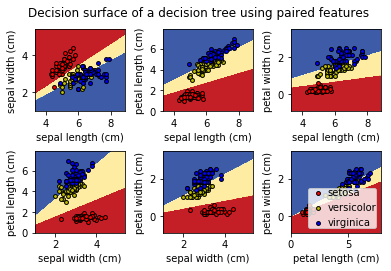

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = MultinomialNB().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()